<a href="https://colab.research.google.com/github/lukezhq10/fcc-predict-health-costs-with-regression/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [35]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
df = pd.read_csv('insurance.csv')
df.tail()

--2023-07-11 01:07:40--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.8’

insurance.csv.8     100%[===================>]  49.09K  --.-KB/s    in 0.004s  

2023-07-11 01:07:40 (13.4 MB/s) - ‘insurance.csv.8’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


# Check missing values

In [36]:
# check null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# Convert categorical data to numbers

## Region

In [37]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [38]:
df = pd.get_dummies(df, columns=['region'])
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.9,0,yes,16884.92,0,0,0,1
1,18,male,33.8,1,no,1725.55,0,0,1,0
2,28,male,33.0,3,no,4449.46,0,0,1,0
3,33,male,22.7,0,no,21984.47,0,1,0,0
4,32,male,28.9,0,no,3866.86,0,1,0,0


## Sex

In [39]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [40]:
sex_mapping = {'female': 0, 'male': 1}
df['sex'] = df['sex'].map(sex_mapping)
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,yes,16884.92,0,0,0,1
1,18,1,33.8,1,no,1725.55,0,0,1,0
2,28,1,33.0,3,no,4449.46,0,0,1,0
3,33,1,22.7,0,no,21984.47,0,1,0,0
4,32,1,28.9,0,no,3866.86,0,1,0,0


In [41]:
df.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

## Smoker

In [42]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [43]:
smoker_mapping = {'no': 0, 'yes': 1}
df['smoker'] = df['smoker'].map(smoker_mapping)
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0


# Create train_dataset and test_dataset

In [44]:
train_dataset, test_dataset = train_test_split(df, test_size=0.2, random_state=42)
train_dataset.value_counts()

age  sex  bmi   children  smoker  expenses  region_northeast  region_northwest  region_southeast  region_southwest
18   0    20.8  0         0       1607.51   0                 0                 1                 0                   1
48   0    32.2  1         0       8871.15   0                 0                 1                 0                   1
47   1    29.8  3         1       25309.49  0                 0                 0                 1                   1
          32.3  1         0       8062.76   0                 0                 0                 1                   1
          36.1  1         1       42211.14  0                 0                 1                 0                   1
                                                                                                                     ..
31   1    28.6  1         0       4243.59   0                 1                 0                 0                   1
          29.8  0         1       19350.37  0

In [45]:
test_dataset.value_counts()

age  sex  bmi   children  smoker  expenses  region_northeast  region_northwest  region_southeast  region_southwest
18   0    26.3  0         0       2198.19   1                 0                 0                 0                   1
47   1    25.4  1         1       21978.68  0                 0                 1                 0                   1
45   0    25.7  3         0       9101.80   0                 0                 0                 1                   1
          38.3  0         0       7935.29   1                 0                 0                 0                   1
     1    39.8  0         0       7448.40   1                 0                 0                 0                   1
                                                                                                                     ..
30   1    25.5  0         0       3645.09   1                 0                 0                 0                   1
          31.6  3         0       4837.58   0

# Create train_labels and test_labels

In [46]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [47]:
train_labels.head()

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
Name: expenses, dtype: float64

In [48]:
test_labels.head()

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
Name: expenses, dtype: float64

# Create and train model

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(train_dataset.keys()))),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.05),
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 9)                36        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 64)                640       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,901
Trainable params: 4,883
Non-trainable params: 18
_________________________________________________________________


In [50]:
# taken from tfdocs.modeling.EpochDots
# prints progress dots during training process at every 100th epoch
class EpochDots(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:
      print()
      print('Epoch: {:d}, '.format(epoch), end='')
      for name, value in sorted(logs.items()):
        print('{}:{:0.4f}'.format(name, value), end=', ')
      print()

    print('.', end='')

In [51]:
# Train model
history = model.fit(train_dataset, train_labels, epochs=500, batch_size=32, validation_split=0.2, verbose=0, callbacks=[EpochDots()])


Epoch: 0, loss:116329664.0000, mae:7151.6685, mse:116329664.0000, val_loss:781669440.0000, val_mae:26518.7754, val_mse:781669440.0000, 
....................................................................................................
Epoch: 100, loss:25381332.0000, mae:3112.4795, mse:25381332.0000, val_loss:22346360.0000, val_mae:2400.9197, val_mse:22346360.0000, 
....................................................................................................
Epoch: 200, loss:21909952.0000, mae:2914.5120, mse:21909952.0000, val_loss:22989064.0000, val_mae:2993.5566, val_mse:22989064.0000, 
....................................................................................................
Epoch: 300, loss:20608890.0000, mae:2871.1997, mse:20608890.0000, val_loss:24099572.0000, val_mae:2736.4880, val_mse:24099572.0000, 
....................................................................................................
Epoch: 400, loss:19317098.0000, mae:2753.8101, mse:19317098.

In [52]:
# Evaluate model on train dataset
train_loss, train_mae, train_mse = model.evaluate(train_dataset, train_labels)
print(train_loss, train_mae, train_mse)

34/34 [==============================] - 0s 2ms/step - loss: 16281202.0000 - mae: 2363.5994 - mse: 16281202.0000
16281202.0 2363.599365234375 16281202.0


# Test

9/9 - 0s - loss: 25100540.0000 - mae: 2935.9912 - mse: 25100540.0000 - 66ms/epoch - 7ms/step
Testing set Mean Abs Error: 2935.99 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 5ms/step


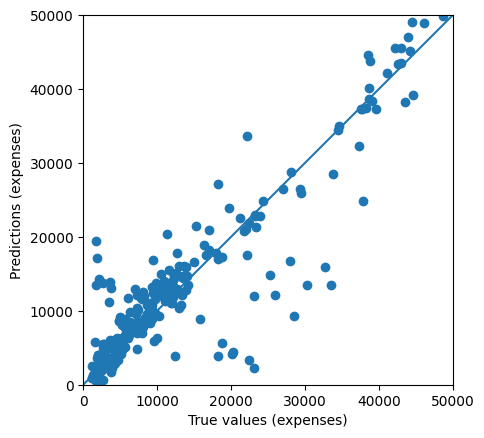

In [53]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
